<a href="https://colab.research.google.com/github/AmaniUsagi/Sentiment-Analysis-Twitter-Users/blob/main/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description: Sentiment Analysis Twitter**

In [1]:
# Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load Data
from google.colab import files
uploaded = files.upload()


Saving amani.csv to amani.csv


In [3]:
# Fetch Data
log = pd.read_csv('amani.csv')

In [4]:
# Twitter API Credentials
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

In [5]:
# Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API Object for auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Extract tweets from user
posts = api.user_timeline(screen_name= "elonmusk", count = 1000, lang = "en", tweet_mode = "extended")
i = 1
# Printing tweets
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

1)@engineers_feed Sphincter valve?

2)@pmarca I wonder what the world be like if Ludendorff hadn’t sent Lenin a train

3)@WorldAndScience Not true. Overwhelmingly, the world will choose batteries.

4)@pmarca Sell Shadow Crew merch to buy Twitter?

5)@pmarca My Shadrow Crew is sickkk!
Also, who are they again?



In [7]:
# Creating dataframe with column tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,@engineers_feed Sphincter valve?
1,@pmarca I wonder what the world be like if Lud...
2,"@WorldAndScience Not true. Overwhelmingly, the..."
3,@pmarca Sell Shadow Crew merch to buy Twitter?
4,"@pmarca My Shadrow Crew is sickkk!\nAlso, who ..."


In [8]:
# Cleaning Data Fetched
def cleanTwt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes the @mentions
  text = re.sub(r'#', '', text) # Removes the hashtags
  text = re.sub(r'RT[\s]+', '', text) # Removes the retweet tag
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyperlinks

  return text

In [9]:
# Show Cleaned Tweets
df['Tweets'] = df['Tweets'].apply(cleanTwt)
df

,Tweets
0,_feed Sphincter valve?
1,I wonder what the world be like if Ludendorff...
2,"Not true. Overwhelmingly, the world will choo..."
3,Sell Shadow Crew merch to buy Twitter?
4,"My Shadrow Crew is sickkk!\nAlso, who are the..."
5,🤣
6,"By mass, Earth is composed of ~32% Iron. Next..."
7,An amazing example of what implanted electrod...
8,Haha he says “Bitcoin” so many times
9,Since I’ve been asked a lot:\n\nBuy stock in s...


In [10]:
# Subjectivity Function
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity Function
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Subjectivity & Polarity columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show columns
df


,Tweets,Subjectivity,Polarity
0,_feed Sphincter valve?,0.000000,0.000000
1,I wonder what the world be like if Ludendorff...,0.000000,0.000000
2,"Not true. Overwhelmingly, the world will choo...",0.825000,0.162500
3,Sell Shadow Crew merch to buy Twitter?,0.000000,0.000000
4,"My Shadrow Crew is sickkk!\nAlso, who are the...",0.000000,0.000000
5,🤣,0.000000,0.000000
6,"By mass, Earth is composed of ~32% Iron. Next...",0.480000,-0.010000
7,An amazing example of what implanted electrod...,0.607143,0.153571
8,Haha he says “Bitcoin” so many times,0.400000,0.350000
9,Since I’ve been asked a lot:\n\nBuy stock in s...,0.533333,-0.133333


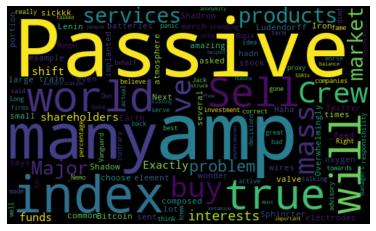

In [11]:
# Check for sentiment distribution by ploting wordcloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Function to compute negative, neutral & positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Positive'
  else:
    return 'Positive'

In [13]:
# Show the Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,_feed Sphincter valve?,0.000000,0.000000,Positive
1,I wonder what the world be like if Ludendorff...,0.000000,0.000000,Positive
2,"Not true. Overwhelmingly, the world will choo...",0.825000,0.162500,Positive
3,Sell Shadow Crew merch to buy Twitter?,0.000000,0.000000,Positive
4,"My Shadrow Crew is sickkk!\nAlso, who are the...",0.000000,0.000000,Positive
5,🤣,0.000000,0.000000,Positive
6,"By mass, Earth is composed of ~32% Iron. Next...",0.480000,-0.010000,Negative
7,An amazing example of what implanted electrod...,0.607143,0.153571,Positive
8,Haha he says “Bitcoin” so many times,0.400000,0.350000,Positive
9,Since I’ve been asked a lot:\n\nBuy stock in s...,0.533333,-0.133333,Negative


In [14]:
# Print all Positive Tweets
j = 1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'): # Checks if the tweets in sorted dataframe has a Positive analysis
    print(str(j) + ')' + sortedDf['Tweets'][i])
    print()
    j = j + 1

1)_feed Sphincter valve?

2) I wonder what the world be like if Ludendorff hadn’t sent Lenin a train

3) Not true. Overwhelmingly, the world will choose batteries.

4) Sell Shadow Crew merch to buy Twitter?

5) My Shadrow Crew is sickkk!
Also, who are they again?

6) 🤣

7) An amazing example of what implanted electrodes can do, even when there are only a few large wires

8) Haha he says “Bitcoin” so many times

9)  Munger is correct

10)_Nemo  Major problem. Passive/index managers should vote in the best interests of shareholders, not shift responsibility to proxy advisory firms.

11)  Exactly. Right before he died, Jack Bogle (of Vanguard fame) said index/passive funds were too great a percentage of the market and he really knew what he was talking about! 

There should be a shift back towards active investment. Passive has gone too far.

12) Exactly, decisions are being made on behalf of actual shareholders that are contrary to their interests! Major problem with index/passive funds.

In [15]:
# Print all Negative Tweets
j = 1
sortedDf = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Negative'): # Checks if the tweets in sorted dataframe has Negative analysis
    print(str(j) + ')' + sortedDf['Tweets'][i])
    print()
    j = j + 1

1) By mass, Earth is composed of ~32% Iron. Next most common element by mass is oxygen at ~30%, but only a small portion of that is in the atmosphere.

2)Since I’ve been asked a lot:

Buy stock in several companies that make products &amp; services that *you* believe in.

Only sell if you think their products &amp; services are trending worse. Don’t panic when the market does.

This will serve you well in the long-term.



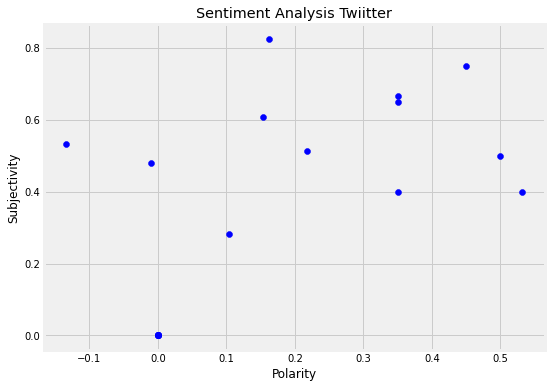

In [16]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis Twiitter')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
# Percentage Positive
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) *100, 1)

90.5

In [18]:
# Percentage Negative
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) *100, 1)

9.5

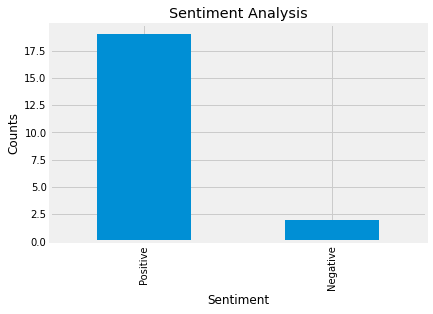

In [19]:
# Value Counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')